# Classification of Bulk materials by Structure borne sound
##### Specialisation in Electrical Engineering

##### Report by : Vishwesh Vishwesh
#####  Guided by Prof. Dr.-Ing. Sascha Spors
##### Institute of Communication Engineering, University of Rostock

## Goal

Bulk material handling system lacks a proper global method to classify the different bulk materials in the industrial level.This document proposes a new model for classifying bulk materials based on structure borne sound. Deep neural networks are the futuristic approach to almost all the classifying problems. Hence using TensorFlow on top of python to create a neural network which classifies the bulk materials based on the structure borne sound that is produced when the materials roll down on a ramp is proposed. Simply, the method involves training the machine for the sounds(structure borne) of various screws, nuts and plastic spheres(Bulk materials) rolling down the ramp and testing it for the accuracy using machine learning techniques.

## Structure borne sound

Sound can be classified into two types based  on its medium of propagation. Sound that travels via air is air-borne and sound that transmits through a solid is structure borne and is created by acoustic energy forcing the vibrations in a solid particle. It travels through the solid structure, finally releasing as airborne sound. For example speech
signals create acoustic energy on walls, which transmit through walls to the other side of the wall and released as air-borne sound again. In other words,
sound that travels through and/or between solid materials is said to be [structure borne](https://en.wikipedia.org/wiki/Acoustic_transmission).
Example:Guitar strings,Stethoscopes.

## Bulk materials

Materials that are manufactured,stored and sold by weight or volume are said to be Bulk materials. Several industries solely produce such materials and there is need for classification of such materials. Here 5 different materials such as Plastic spheres, M3 size steel nut, M4 size steel nut, M4 size messing nut and screws are used as testing samples to drop it down the ramp. 

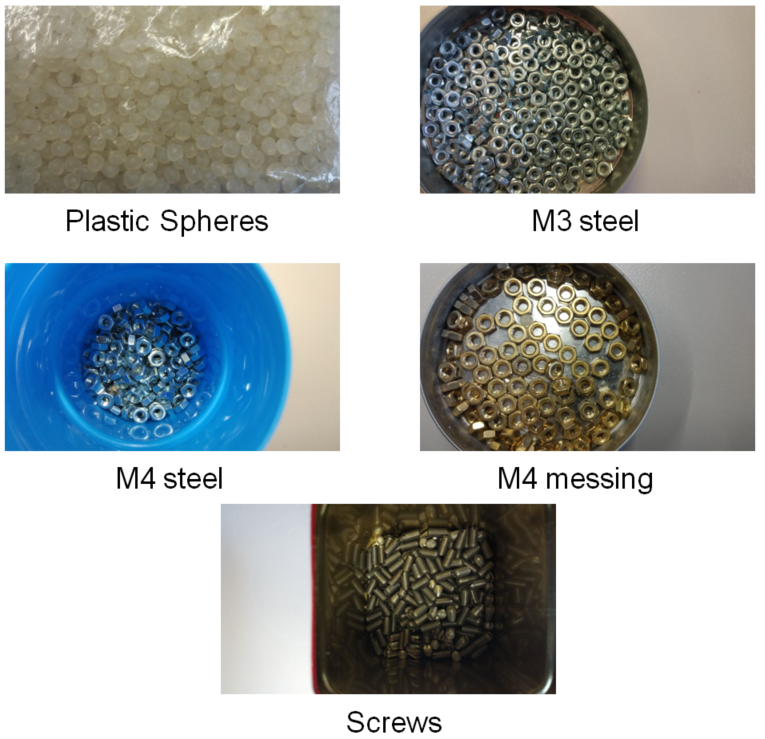

## Flow chart

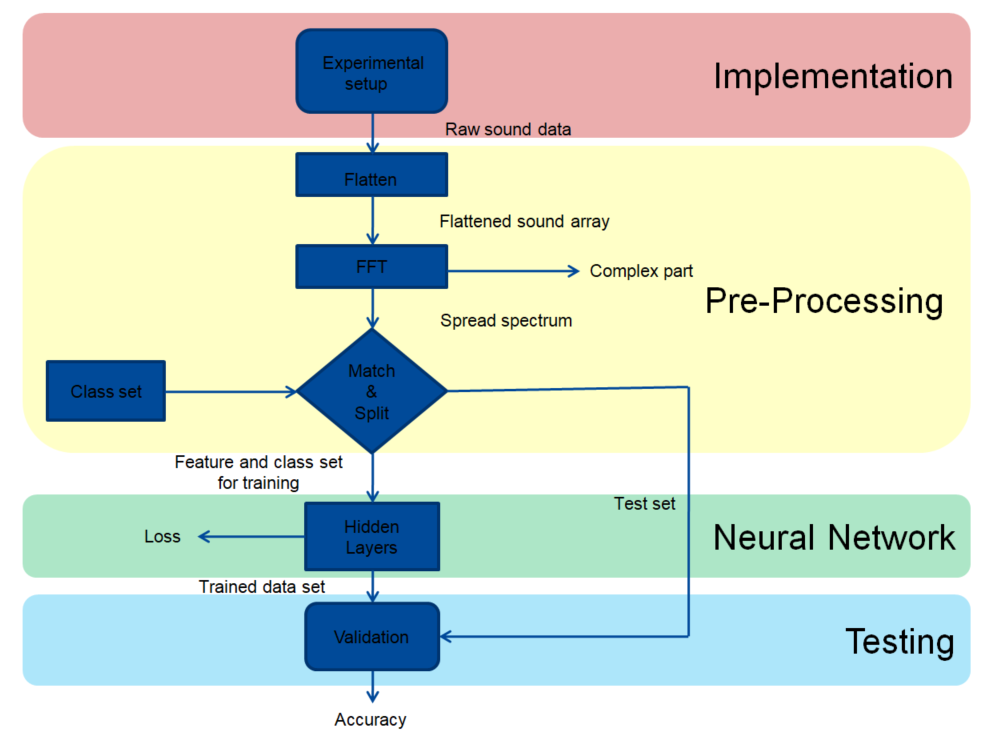

Here is the short description of how the sound samples are obtained, processed, trained and tested. Sound is obtained by experimental set up in implementation part. Raw sound samples are processed in pre-processing segment of the graph. Processed sound samples are called Feature sets. They are fed into a Neural network Segment to train the machine. In testing segment, Training is validated using the test set and accuracy is calculated. 

## Implementation

A Funnel and Ramp set up is used to get the experimental sound data. Lid is closed at the lower end of the funnel and various Bulk materials are filled inside the funnel. Microphones were set up as seen in the figure below. Then the lid is opened, and structure borne sound that is created by bulk materials rolling down the ramp is recorded and saved as .wav file. This format of sound is used because it is lossless in nature and recordings are accurate. It is simple in its format and easy to extract features and edit. 

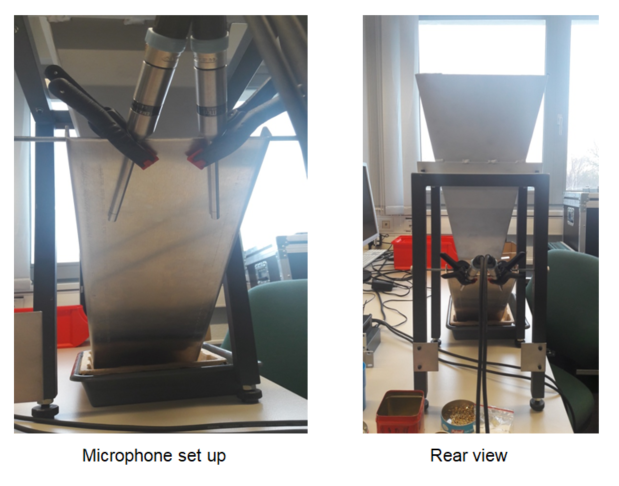

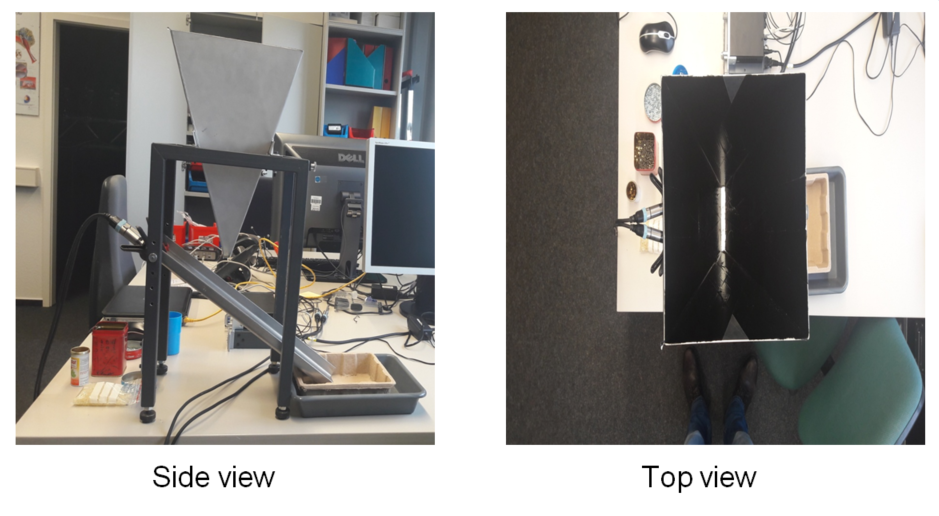

## Pre processing the sound 

In [1]:
import numpy as np

[Numpy](http://www.numpy.org/) is a python library mainly allows the use of  N-dimensional arrays, linear algebra and Fourier transforms. Since sound can be represented in multidimensional arrays, numpy packages hold an inevitable role in the current topic.   

In [2]:
 import soundfile as sf

[PySoundfile](https://pysoundfile.readthedocs.io/en/0.9.0/) or simply soundfile is an audio library for python which helps to read and write sound files.

In [3]:
size = 1023
step = 256

Size is the length of segment and removing the step from size gives the overlap of the segment.

In [4]:
n_classes = 5

Number of classes is the different sound samples and for the current topic 5 bulk materials have been used.

In [5]:
fprefix = 'data/07_12_2017_recordings/'
flist = {
        'plastic_spheres_1.wav': 0,
        'plastic_spheres_2.wav': 0,
        'plastic_spheres_3.wav': 0,
        'plastic_spheres_4.wav': 0,
        'ramp_M3_1_steel.wav': 1,
        'ramp_M3_2_steel.wav': 1,
        'ramp_M3_3_steel.wav': 1,
        'ramp_M3_4_steel.wav': 1,
        'ramp_M4_1_steel.wav': 2,
        'ramp_M4_2_steel.wav': 2,
        'ramp_M4_3_steel.wav': 2,
        'ramp_M4_4_steel.wav': 2,
        'ramp_M4_1_messing.wav': 3,
        'ramp_M4_2_messing.wav': 3,
        'ramp_M4_3_messing.wav': 3,
        'ramp_M4_4_messing.wav': 3,
        'ramp_screws_1.wav' : 4,
        'ramp_screws_2.wav' : 4,
        'ramp_screws_3.wav' : 4,
        'ramp_screws_4.wav' : 4
        }

Above is the list of sound files with alotted class to each of the file name. Each material is dropped down the ramp 4 times to get larger data set. Larger the input data set, more will be the accuracy of prediction.

In [7]:
def import_data(fname,nclass,size,step):
    # read wav file
    data, _ = sf.read(fname)
    #print('raw wav file = ',data)
    # normalize level
    data = data/np.max(np.abs(data[:]))
    # put both channels into one array
    data = np.ndarray.flatten(data, order='F')
    # segment and sort into feature matrix
    nseg = np.ceil((len(data)-size)/step)
    x = np.array([ data[i*step:i*step+size] for i in range(int(nseg)) ])
    # construct target vector
    y = np.zeros((x.shape[0],n_classes),dtype=np.int)
    y[:,nclass] = 1 #one hot
    return x, y

# load data from audio recordings
x = np.empty((0, size))
y = np.empty((0, n_classes), dtype=np.int)
for fname, nclass in flist.items():
    xt, yt = import_data(fprefix+fname, nclass, size=size, step=step)
    x = np.append(x, xt, axis=0)
    y = np.append(y, yt, axis=0)
print(x)
print(y)
#print('raw wav file = ',data1)

[[  2.71274992e-03   1.70802773e-03   1.30613885e-03 ...,   4.07917211e-02
   -5.38531096e-02  -3.19501658e-02]
 [ -1.00572692e-01   6.65126093e-02  -4.08921933e-02 ...,  -1.99939717e-02
    1.19561941e-02   1.73816940e-02]
 [  1.36642218e-01   2.58213604e-02   5.37526374e-02 ...,  -7.43494424e-03
    2.86345825e-02   5.58625540e-02]
 ..., 
 [ -3.49125157e-03  -3.36946373e-03  -2.88231235e-03 ...,  -1.21787846e-03
   -1.38026225e-03  -1.66443389e-03]
 [  1.70502984e-03   1.86741363e-03   1.82681768e-03 ...,   0.00000000e+00
    4.05959485e-05   0.00000000e+00]
 [ -3.24767588e-04  -3.65363537e-04  -2.02979743e-04 ...,  -6.08939228e-04
   -6.49535176e-04  -4.05959485e-04]]
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ..., 
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


Wav files are read, which form an [array](http://localhost:8888/notebooks/classification%20of%20bulk%20materials/1.ipynb "Raw wav file(data)") of size (194048,2). This array is normalized. This array has two columns refering to two channels. Both columns are put into single array or flattened to a one dimensional [array](http://localhost:8888/notebooks/classification%20of%20bulk%20materials/2.ipynb "Flattened wav file") This array is segmented and sorted into a feature matrix [x]  which acts as the data set for testing and training samples. The target vector y is created in one hot form.

Labelling the dataset: sound data can just be labelled using number of classes (0 to N-1 in this case) and model will be allowed to assume a linear ordering between classes. But this may result in a poor performance, hence the One hot encoding is used. representation of integer values in boolean form is called [one hot](https://en.wikipedia.org/wiki/One-hot) encoding.

Data is loaded from the flist. x is created according to 'size' and y is created according to 'number of classes'.

In [8]:
x = np.abs(np.fft.rfft(x, axis=1))
x = np.float32(x) # float64 to float32
print(x)

[[  6.70250177e-01   4.73048747e-01   2.62031496e-01 ...,   1.42159581e-01
    3.28675248e-02   2.22658008e-01]
 [  1.72621322e+00   5.63274860e-01   3.55960041e-01 ...,   1.34412766e-01
    1.55881792e-01   2.80862421e-01]
 [  1.94855821e+00   5.96555114e-01   1.35490477e-01 ...,   1.12853922e-01
    6.74681440e-02   1.87971845e-01]
 ..., 
 [  3.88503224e-02   3.30200680e-02   3.46692987e-02 ...,   2.22685747e-03
    8.17900617e-03   3.08943889e-03]
 [  7.98928291e-02   5.90798147e-02   2.41128448e-02 ...,   4.47538448e-03
    6.01937296e-03   4.56765341e-03]
 [  7.76600465e-02   4.04615961e-02   3.74307856e-02 ...,   9.79090575e-04
    1.02243433e-02   5.37320785e-03]]


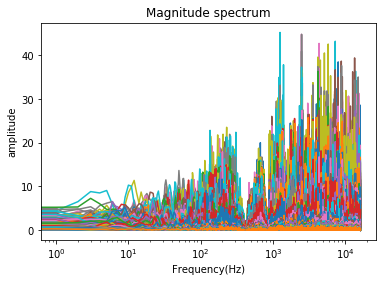

In [9]:
import matplotlib.pyplot as plt
plt.plot(x)
plt.title('Magnitude spectrum')
plt.xscale('log')
plt.xlabel('Frequency(Hz)')
plt.ylabel('amplitude')
plt.show()

Magnitude spectrum of Dataset [x] is used as feauture. A [fast fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform "np.fft.rfft") is performed on [x] to yield the Discrete fourier transform (DFT). This dataset contains complex values, which further contribute in reduction of accurancy. Hence complex parts are removed.


This dataset is of datatype [float64](https://docs.scipy.org/doc/numpy/user/basics.types.html) which takes up more memory and when there is large dataset, it can be logical to use dataset of type [float32](https://docs.scipy.org/doc/numpy/user/basics.types.html) which saves memory and time at the cost of precision. But this is always a trade off between accuracy and speed.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# split data into training/test subset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, train_size=3/4, random_state=42)
print('loaded {0:5.0f}/{1:<5.0f} training/test samples'.format(x_train.shape[0], x_test.shape[0]))

loaded 12238/4080  training/test samples


Now there are two datasets,[x], which is a magnitude spectrum of soundfiles and [y], which is the one hot target vector or class specification vector.
train_test_split function of [sklearn](https://en.wikipedia.org/wiki/Scikit-learn "scikit-learn") splits the arrays of both datasets into desired sizes for testing and training. Here, test_size is 25% of the data and remaining 75% of the data is train_size. random_state must be set to an integer value so that on multiple runs, the code gives the same output split for a particular [random_state](https://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn "here 42"). When the random_state is not defined, code gives out a different split value everytime the code is run.

## Building the Deep Neural Network (DNN)

Artificial neural network is inspired the biological neural network or an animal brain. This system learns progressively to improve performance by considering examples. [Deep neural network](https://en.wikipedia.org/wiki/Deep_learning) is a type of Artificial neural network with multiple hidden layers between input and output layer. Output layer constantly reduces the losses over a number of iterations while hidden layers transfer the information set from input layer to output layer repetitively. 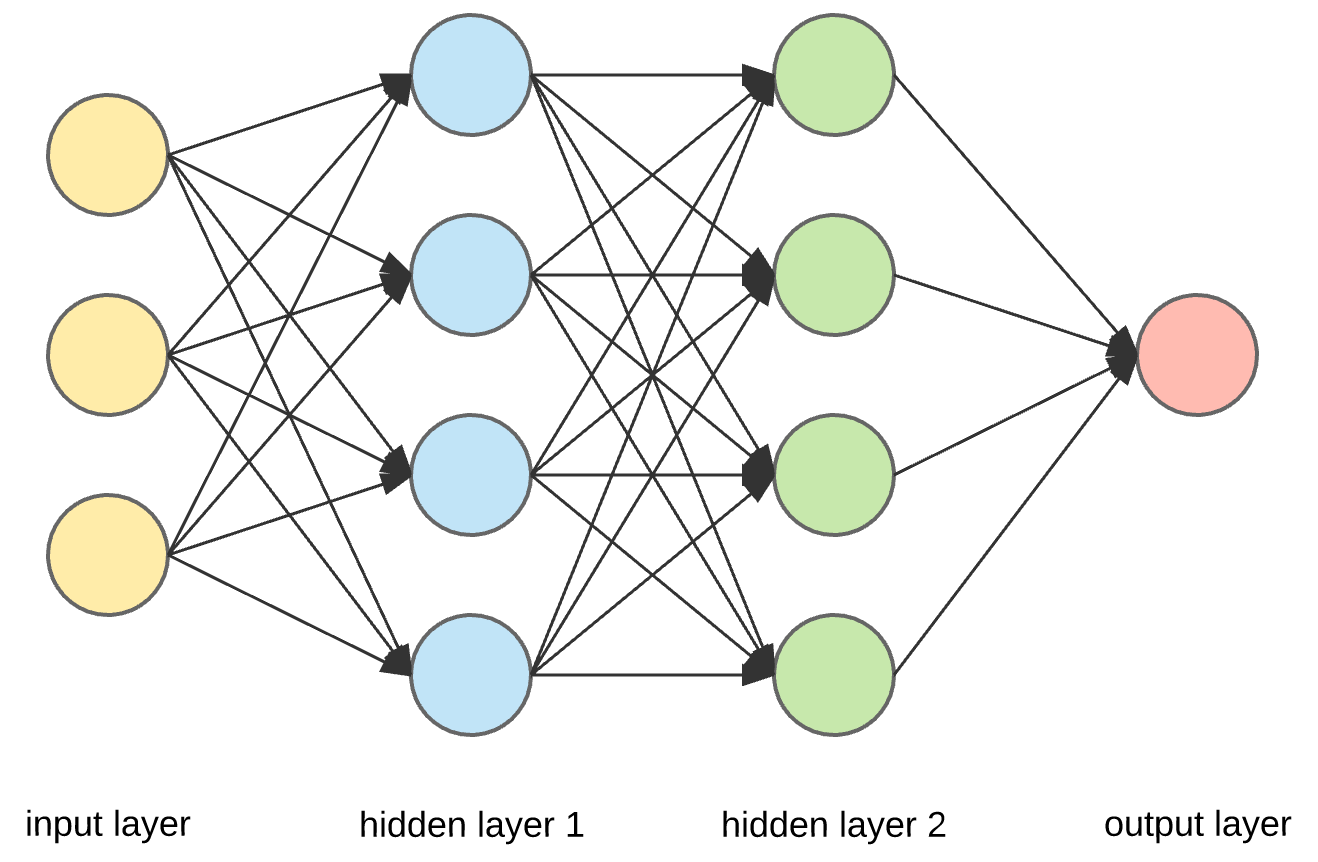 
[Source](https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6)  



In [12]:
import tensorflow as tf
import tflearn

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


[TensorFlow](https://en.wikipedia.org/wiki/TensorFlow "www.tensorflow.org") is a library for dataflow programming like python. It finds its main use in machine learning applications like neural networks because it can easily create layers of computational graph. Nodes in the above graph represent mathematical operations and edges or neurons represent the multidimensional data arrays called tensors.
[TFLearn](http://tflearn.org "http://tflearn.org") is a Deep learning library built on top of tensorflow. It is designed to provide higher level [API](https://www.google.de/search?q=API&rlz=1C1CHBF_deDE724DE724&oq=API&aqs=chrome..69i57j69i61j69i60j0l3.950j0j4&sourceid=chrome&ie=UTF-8 "application Programming Interface") to TensorFlow to increase the speed of the experiments and speed-up the training task.

Deep Neural Networks work by consecutively modeling small pieces of the information (x_train) and combining them deeper in network.
First layer is used for feeding the data to the network (tflearn.input_data()). This layer specifies the shape of the input data. Shape of this array is (batch_size, column length of x_train) and gives out an output of [placeholder tensor](https://learningtensorflow.com/lesson4/) with the given shape.

In [13]:
shape_of_input_data= print([None, x_train.shape[1]])

[None, 512]


Subsequent layers are called fully connected layers (tflearn.fully_connected()).
First subsequent layer takes the Input_layer tensor, a 2 dimensional tensor given by output of input layer. number of units for each subsequent layer is specified.(128,128,64 in current scenario)

Activation function is the transfer function of non-linear systems like DNN. It defines the output of the hidden layer in a neural network. If activation=None, then the activation is linear, [f(x)=x], but only non-linear activation functions improve the computational accuracy of the system.

Some important activation funtions are Linear, Hyperbolic Tan(Tanh), Sigmoid,softmax,Rectified linear. Here tanh activation funtion is used to build the three layers of neural network. So why tanh and not others? Below are set of codes to find the losses with the neural networks with various activation functions.

In [34]:
tf.reset_default_graph()
net = tflearn.input_data(shape=[None, x_train.shape[1]],name='Input_layer')
net = tflearn.fully_connected(net, 128, activation='linear', regularizer='L2', weight_decay=0.001,name='layer_1')
net = tflearn.fully_connected(net, 128, activation='linear', regularizer='L2', weight_decay=0.001,name='layer_2')
net = tflearn.fully_connected(net, 64, activation='linear', regularizer='L2', weight_decay=0.001,name='layer_3')
net = tflearn.fully_connected(net, n_classes, activation='softmax',name='output_layer')

#regression (explained later in the Document)
sgd = tflearn.SGD(learning_rate=0.1, lr_decay=0.96, decay_step=1000)
top_k = tflearn.metrics.Top_k(1)
net = tflearn.regression(net, optimizer=sgd, metric=top_k, loss='categorical_crossentropy')
# Training (explained later in the Document)
model = tflearn.DNN(net, tensorboard_verbose=3)
model.fit(x_train, y_train, show_metric=True, n_epoch=20)

Training Step: 3839  | total loss: 0.63905 | time: 16.007s
| SGD | epoch: 020 | loss: 0.63905 - top1: 0.8617 -- iter: 12224/12238
Training Step: 3840  | total loss: 0.59896 | time: 16.085s
| SGD | epoch: 020 | loss: 0.59896 - top1: 0.8646 -- iter: 12238/12238
--


In [17]:
tf.reset_default_graph()
net = tflearn.input_data(shape=[None, x_train.shape[1]],name='Input_layer')
net = tflearn.fully_connected(net, 128, activation='sigmoid', regularizer='L2', weight_decay=0.001,name='layer_1')
net = tflearn.fully_connected(net, 128, activation='sigmoid', regularizer='L2', weight_decay=0.001,name='layer_2')
net = tflearn.fully_connected(net, 64, activation='sigmoid', regularizer='L2', weight_decay=0.001,name='layer_3')
net = tflearn.fully_connected(net, n_classes, activation='softmax',name='output_layer')

#regression (explained later in the Document)
sgd = tflearn.SGD(learning_rate=0.1, lr_decay=0.96, decay_step=1000)
top_k = tflearn.metrics.Top_k(1)
net = tflearn.regression(net, optimizer=sgd, metric=top_k, loss='categorical_crossentropy')
# Training (explained later in the Document)
model = tflearn.DNN(net, tensorboard_verbose=3)
model.fit(x_train, y_train, show_metric=True, n_epoch=20)

Training Step: 3839  | total loss: 1.57807 | time: 9.768s
| SGD | epoch: 020 | loss: 1.57807 - top1: 0.2452 -- iter: 12224/12238
Training Step: 3840  | total loss: 1.58251 | time: 9.836s
| SGD | epoch: 020 | loss: 1.58251 - top1: 0.2426 -- iter: 12238/12238
--


In [20]:
tf.reset_default_graph()
net = tflearn.input_data(shape=[None, x_train.shape[1]],name='Input_layer')
net = tflearn.fully_connected(net, 128, activation='relu', regularizer='L2', weight_decay=0.001,name='layer_1')
net = tflearn.fully_connected(net, 128, activation='relu', regularizer='L2', weight_decay=0.001,name='layer_2')
net = tflearn.fully_connected(net, 64, activation='relu', regularizer='L2', weight_decay=0.001,name='layer_3')
net = tflearn.fully_connected(net, n_classes, activation='softmax',name='output_layer')

#regression (explained later in the Document)
sgd = tflearn.SGD(learning_rate=0.1, lr_decay=0.96, decay_step=1000)
top_k = tflearn.metrics.Top_k(1)
net = tflearn.regression(net, optimizer=sgd, metric=top_k, loss='categorical_crossentropy')
# Training (explained later in the Document)
model = tflearn.DNN(net, tensorboard_verbose=3)
model.fit(x_train, y_train, show_metric=True, n_epoch=20)

Training Step: 3839  | total loss: 0.17639 | time: 12.184s
| SGD | epoch: 020 | loss: 0.17639 - top1: 0.9385 -- iter: 12224/12238
Training Step: 3840  | total loss: 0.17145 | time: 12.248s
| SGD | epoch: 020 | loss: 0.17145 - top1: 0.9400 -- iter: 12238/12238
--


In [23]:
tf.reset_default_graph()
net = tflearn.input_data(shape=[None, x_train.shape[1]],name='Input_layer')
net = tflearn.fully_connected(net, 128, activation='softmax', regularizer='L2', weight_decay=0.001,name='layer_1')
net = tflearn.fully_connected(net, 128, activation='softmax', regularizer='L2', weight_decay=0.001,name='layer_2')
net = tflearn.fully_connected(net, 64, activation='softmax', regularizer='L2', weight_decay=0.001,name='layer_3')
net = tflearn.fully_connected(net, n_classes, activation='softmax',name='output_layer')

#regression (explained later in the Document)
sgd = tflearn.SGD(learning_rate=0.1, lr_decay=0.96, decay_step=1000)
top_k = tflearn.metrics.Top_k(1)
net = tflearn.regression(net, optimizer=sgd, metric=top_k, loss='categorical_crossentropy')
# Training (explained later in the Document)
model = tflearn.DNN(net, tensorboard_verbose=3)
model.fit(x_train, y_train, show_metric=True, n_epoch=20)

Training Step: 3839  | total loss: 1.59377 | time: 10.878s
| SGD | epoch: 020 | loss: 1.59377 - top1: 0.2519 -- iter: 12224/12238
Training Step: 3840  | total loss: 1.59095 | time: 10.935s
| SGD | epoch: 020 | loss: 1.59095 - top1: 0.2533 -- iter: 12238/12238
--


In [26]:
tf.reset_default_graph()
net = tflearn.input_data(shape=[None, x_train.shape[1]],name='Input_layer')
net = tflearn.fully_connected(net, 128, activation='tanh', regularizer='L2', weight_decay=0.001,name='layer_1')
net = tflearn.fully_connected(net, 128, activation='tanh', regularizer='L2', weight_decay=0.001,name='layer_2')
net = tflearn.fully_connected(net, 64, activation='tanh', regularizer='L2', weight_decay=0.001,name='layer_3')
net = tflearn.fully_connected(net, n_classes, activation='softmax',name='output_layer')

#regression (explained later in the Document)
sgd = tflearn.SGD(learning_rate=0.1, lr_decay=0.96, decay_step=1000)
top_k = tflearn.metrics.Top_k(1)
net = tflearn.regression(net, optimizer=sgd, metric=top_k, loss='categorical_crossentropy')
# Training (explained later in the Document)
model = tflearn.DNN(net, tensorboard_verbose=3)
model.fit(x_train, y_train, show_metric=True, n_epoch=20)

Training Step: 3839  | total loss: 0.54059 | time: 12.727s
| SGD | epoch: 020 | loss: 0.54059 - top1: 0.8551 -- iter: 12224/12238
Training Step: 3840  | total loss: 0.51813 | time: 12.788s
| SGD | epoch: 020 | loss: 0.51813 - top1: 0.8586 -- iter: 12238/12238
--


From the above examples it is evident that,even though Linear activation funtion outputs an acceptable loss value and rectified linear performs better in loss reduction, tanh reduces the loss value even better and evenly distributes precision and recall. From above trials, sigmoid and softmax functions in hidden layers proved faulty by completely failing to predict the classes when tested. Linear activation function gave a precision/recall of 80/75, rectified linear predicted with precision/recall of 93/91 and tanh predicted labels with 92/92.

One important reason behind behaviour of tanh would be because of shape of its plot.  

$$f(z)=tanh(z) = 2/(1+e^{-2z})-1$$

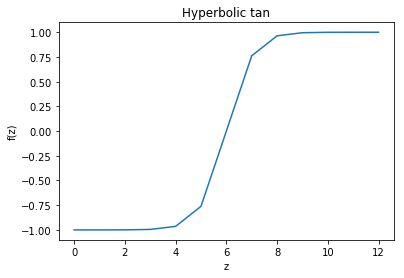

In [61]:
#plot of tanh()
t1 = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
plt.plot(np.tanh(t1))
plt.xlabel("z")
plt.ylabel("f(z)")
plt.title("Hyperbolic tan")
plt.show()

This function maps the input values between -1 to 1 as predictions. Above image shows that, for input values 4>z>8, the predictions become clearer. Since this document considers sound samples with high frequency values, we can conclude decision making must be easier for the tanh function. This can be realised by using a seperate input values and is not in the scope of this document. [Source](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0 "Activation funtions")
A softmax activation function gave a better result when used in output layer only, it can be because of its attribute of uniform distribution for low values. 

At some point in training data sets, it might seem as though the loss is decreasing but accuracy reaches a level and stays constant thereafter. This means the network is not learning new information anymore. This is called overfitting or overtraining. To avoid overfitting problem, either amount of training data must be increased, then testing data will reduce which does not seem to be the right way, or by reducing the size of the network, but larger networks have the potential to perform better. So this option is ruled out too.
There is a better way to solve overfitting called regularization. L2 regularizer worked the best for this work because it prefers to learn smaller weights in the network. Higher weights are only considered if it significantly reduces the loss. While L1 regularizer performed poor, dropout technique worked quite similar to that of L2. Here we stick with L2 regularizer. [Source](http://neuralnetworksanddeeplearning.com/chap3.html)

In [37]:
tf.reset_default_graph()
net = tflearn.input_data(shape=[None, x_train.shape[1]],name='Input_layer')
print('output tensor of input layer - ',net)
net = tflearn.fully_connected(net, 128, activation='tanh', regularizer='L2', weight_decay=0.001,name='layer_1')
print('output tensor of first layer - ',net)
net = tflearn.fully_connected(net, 128, activation='tanh', regularizer='L2', weight_decay=0.001,name='layer_2')
print('output tensor of second layer - ',net)
net = tflearn.fully_connected(net, 64, activation='tanh', regularizer='L2', weight_decay=0.001,name='layer_3')
print('output tensor of third layer - ',net)
net = tflearn.fully_connected(net, n_classes, activation='softmax',name='output_layer')
print('output tensor of output layer - ',net)

output tensor of input layer -  Tensor("Input_layer/X:0", shape=(?, 512), dtype=float32)
output tensor of first layer -  Tensor("layer_1/Tanh:0", shape=(?, 128), dtype=float32)
output tensor of second layer -  Tensor("layer_2/Tanh:0", shape=(?, 128), dtype=float32)
output tensor of third layer -  Tensor("layer_3/Tanh:0", shape=(?, 64), dtype=float32)
output tensor of output layer -  Tensor("output_layer/Softmax:0", shape=(?, 5), dtype=float32)


## Regression

[Regression](https://en.wikipedia.org/wiki/Regression_analysis) is a statistical analysis used by TFlearn to minimize the loss function. It makes use of optimizer to minimize the loss function everytime in the output layer and a metric is provided to evaluate the performance.

In [38]:
# Regression using SGD with learning rate decay and Top-3 accuracy
#opt = tflearn.SGD(learning_rate=0.1, lr_decay=0.96, decay_step=1000)
#Regression using RMSProp
opt = tflearn.RMSProp(learning_rate=0.001,decay=0.9)
top_k = tflearn.metrics.Top_k(1)
net = tflearn.regression(net, optimizer=opt, metric=top_k, loss='categorical_crossentropy')

Most widely used optimizer is Stochastic gradient descent. It lowers the learning rate as the training progresses and returns a decayed learning rate in each iterations. But here, choosing a perfect learning rate can be tricky, as small learning rates cause slow progress of the training and higher learning rates may cause fluctuations in loss funtion. [RMSProp](https://www.coursera.org/learn/neural-networks/lecture/YQHki/rmsprop-divide-the-gradient-by-a-running-average-of-its-recent-magnitude "by Geoffrey Hinton") optimizer however automatically adjusts its learning rate. Learning rate here is iteratively updated with average of magnitude of squares of previous iteration.
For the current experiment though SGD worked decently, a less used method of RMSProp is employed which gave still better accuracies in the end. Metrics evaluate the performance of the model. Top_k is a metric which computes mean accuracy of top k network values(compared later in Tensorboard). Loss parameter uses categorical crossentropy function to compute the difference in information between predicted values and current outputs.

## Training the network

Feeding the values of training sets and target sets to the network is done in this step. A fit operation is done on training data sets and target data sets. Here number of epochs are mentioned. One forward pass and one backward pass of all training examples is one epoch. Fit operation also specifies batch size, which is number of examples trained in each epoch. Batch size is auto adjusted if not mentioned in the code. For example, if there are 100 training examples and batch size is 50, then it will take 2 iterations to complete one epoch. 

In [39]:
# Training
model = tflearn.DNN(net, tensorboard_verbose=3)
model.fit(x_train, y_train, show_metric=True, n_epoch=80)

Training Step: 15359  | total loss: 0.08932 | time: 14.317s
| RMSProp | epoch: 080 | loss: 0.08932 - top1: 0.9754 -- iter: 12224/12238
Training Step: 15360  | total loss: 0.08661 | time: 14.434s
| RMSProp | epoch: 080 | loss: 0.08661 - top1: 0.9747 -- iter: 12238/12238
--


## Testing

[Classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) is a scikit-learn funtion to produce a text report showing the main classification metrics. It includes predictions of test data set and  test class vector[y]. It formulates the results in terms of precision, recall and harmonic average of both as f1-score and number of points corresponding to each label/class. More accurate explaination of this is provided along with the Confusion matrics structure.

In [40]:
from sklearn.metrics import classification_report

predictions = model.predict_label(x_test)
predictions = predictions[:,0]
y_testc = np.argmax(y_test, axis=1) 
print(y_testc)
#print(y_test)
print(classification_report(y_testc, predictions, target_names=('plastic spheres', 'M3 steel', 'M4 steel', 'M4 messing', 'Screws')))

[4 0 4 ..., 2 1 4]
                 precision    recall  f1-score   support

plastic spheres       0.99      0.99      0.99      1046
       M3 steel       0.99      0.57      0.72       589
       M4 steel       0.89      0.96      0.93       704
     M4 messing       0.82      0.91      0.86       913
         Screws       0.90      0.99      0.94       828

    avg / total       0.92      0.91      0.90      4080



In [41]:
conf_mat = tf.confusion_matrix(labels=y_testc, predictions=predictions, num_classes=5)

with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(conf_mat, feed_dict=None, session=None))

Confusion Matrix: 

 [[1038    0    4    0    4]
 [   9  336   46  176   22]
 [   0    2  679   10   13]
 [   2    1   26  834   50]
 [   1    0    5    3  819]]


[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix "Error matrix") evaluates the quality of the output or evaluates accuracy of classification in machine learning. In this matrix, diagonal elements represent the correct predictions while other elements represent wrong predictions. Higher the diagonal values, better is the quality of the model. [Source](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

For the current results, there were 1046 test samples or points for plastic spheres(label 0). Among these, the trained model successfully predicted 1038 points and just 8 points were misplaced. For second label(label 1), there were 589 points for testing out of which, 336 were predicted precisely and rest were mislabelled. This way the confusion matrix can be realised.

There are 1046 points in label 0 (plastic spheres) of test set and model predicted 1038 of them precisely, i.e, recall = 1038/1046 = 0.99 for plastic spheres. For label 1(M3 steel), 336 points were predicted precisely out of 589 points of test set, recall = 336/589=93.
To find precision, column values are considered. For first column,  1038 is marked correctly and rest are, 9, 0, 2 and 1, adding up to 12 points, Which are false detected values for label 0. Precision = (Correct prediction points)/(total predictions for the class). For label 0, precision = 1038/1050 = 0.99 = 99%.
f1-recall is the harmonic mean of precision and recall values. [Source1](https://stackoverflow.com/questions/30746460/how-to-interpret-scikits-learn-confusion-matrix-and-classification-report)   [Source2](https://en.wikipedia.org/wiki/Precision_and_recall "Precision and recall")

## Tensorboard

[Tensorboard](https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard) is a visualization tool for TensorFlow which helps to visualize data for debugging and optimization. Tensorboard is initialized by running the function tensorboard_verbose in DNN training section and running a command "tensorboard --logdir /tmp/tflearn_logs" in the directory. It provides a brief control flow graph of the neural network using which one can optimize the network and supports various scalar graphs,distributions and histograms for comparison of different runs of the code.
Only Scalar graphs are taken from the current results to summarize the losses in this case.

### Losses

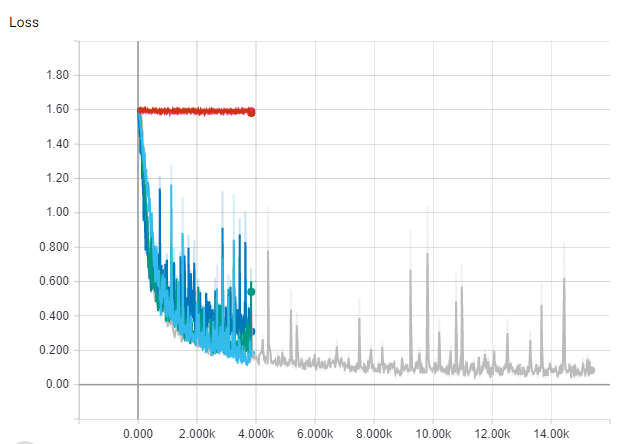

Above is a plot of various losses when different activation functions were used for three layers of neural network. Red and Pink lines, overlapping each other, represent sigmoid and softmax functions, which prove faulty since their curve never drops below 1.60 loss. Blue is for linear activation and Aqua and Green are Rectified linear (ReLu) and Tanh respectively. All these representations are for just 20 epochs and ReLu seems to be dominating the chart, but on the longer run Tanh is time efficient. Hence it is used and plotted in grey for 80 epochs where the loss is below 0.1.

### Top_K inference

Below are the graphs for top_k functions for k=1 and k=2. It is observed that graph almost becomes constant just above k value  0.800. Hence using a higher k value would not contribute to the accuracy anymore in this case. 

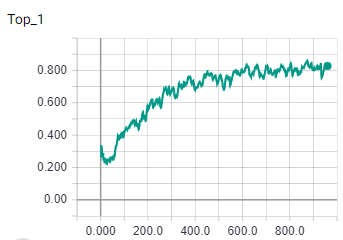 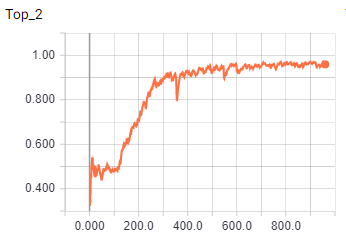

### Losses in each Layers with SGD

Below are the three graphs representing three layers of neural network when SGD is used as the optimizer. Green line represents the Tanh activation function and aqua represents the Rectified linear. These graphs summarize the fact that in the long run, after three layers, Tanh in combination with SGD optimizer and L2 regularizer reduces the loss more compared to ReLu. 

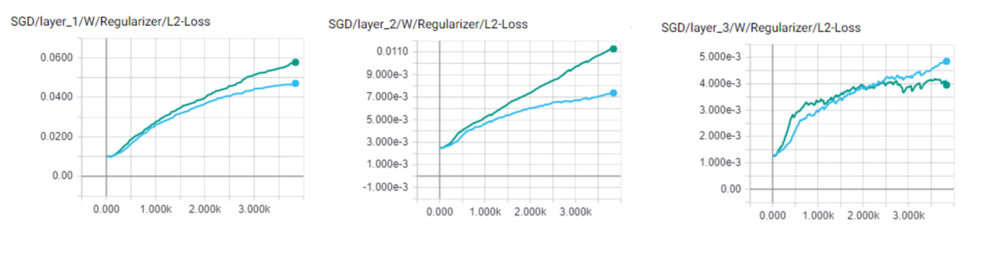

### Losses in layers with RMSProp

The graphs below show the losses in each layer of neural network when RMSProp optimizer is used with Tanh activation function. After 8000 steps, the curve sees a drastic fall in third layer, which supports the purpose of using RMSProp instead of widely used SGD. 

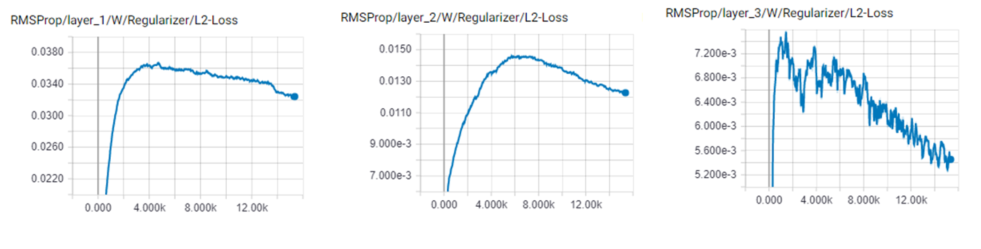

## Applications

Even though there are numerous classification frameworks available to distinguish the bulk materials based on their characteristics such as size, weight, abrasiveness, which take up a lot of space, hardware and still with the chance of getting it wrong, this particular framework is designed based on sound pattern of the bulk material using the deep neural networks. It helps to detect the bulk materials precisely with minimum requirement of hardware, thus proving to be more economic and time saving. It finds its application in Industries that produce various bulk materials of different size, shape and material to sort them out for packing right after manufacturing.  

## Future scope 

In addition to dlassification of different bulk materials, there can be a situation where various bulk materials are mixed(ex:screws of two different shapes), then the model should be able to detect presence of the both so that a seperation technique can be used on it. A synthetic mixture of two such sounds gave out an accuracy of 70% approximately. As an accuracy above 70% is obtained, this can be considered as a successful case to be analysed further. Physical mixture of such various materials has to be carried out in further study.   

## Further references

1. [TFLearn - Deep Learning with Neural Networks and TensorFlow](https://www.youtube.com/watch?v=NMd7WjZiCzc "by sentdex")
2. [TFLearn: Deep learning library](http://tflearn.org/)
3. [Scikit-learn](http://scikit-learn.org)
4. [TensotFlow](https://www.tensorflow.org/)
5. [Tensorboard](https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard)
6. [www.coursera.org](https://www.coursera.org/learn/neural-networks/lecture/YQHki/rmsprop-divide-the-gradient-by-a-running-average-of-its-recent-magnitude "RMSProp by Geoffrey Hinton")
7. [www.slideshare.net](https://www.slideshare.net/ynamho/structure-borne)